In [2]:
import json
# import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
import pickle
from constants import *
import rioxarray as rxr
from locale import atof, setlocale, LC_NUMERIC
from pyproj import crs


# plt.style.use(home_ir+'stylefile.mplstyle')
# setlocale(LC_NUMERIC,'')
# atof('123,123')
homedir = '/global/home/users/cowherd/snow_fires/'
datadir = '/global/scratch/users/cowherd/'

os.chdir(homedir)

wgs_crs = crs.CRS('epsg:4326')
use_crs = wgs_crs


In [3]:
from load_data import *
## gives fires_allyears, wfigs20, gages_metadata, bas_all, gaged_basins_gdf, snowzone
## all in wgs crs

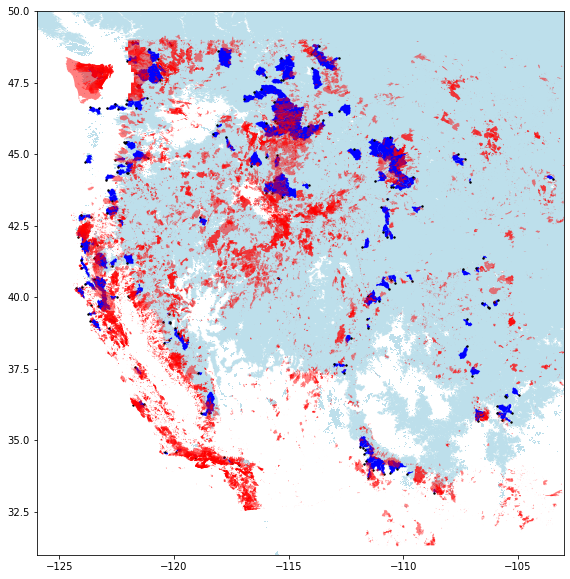

<Figure size 432x288 with 0 Axes>

In [4]:
## plot showing gaged basins that fit the williams parameters, location of the gages, and fire boundaries
fig,ax=plt.subplots(figsize=(10,10))
snowzone.plot(ax=ax, color='lightblue',alpha=0.8) ## snowzone
gaged_basins_gdf.plot(ax=ax,color='blue') ##outlines of gaged basins
gages_metadata.plot(ax=ax,color='k',markersize=2)
fires_allyears.plot(ax=ax,color='red',alpha=0.5) ## fires
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
plt.show()
plt.savefig(homedir + 'figures/snowzone_context.jpg')


In [ ]:
## get fires from all years that are in the gaged watersheds
gaged_fires = gpd.sjoin(fires_allyears,gaged_basins)

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
gaged_fires.plot(ax=ax,color='red',alpha=0.5)
gaged_basins.boundary.plot(ax=ax,color='black')
plt.show()

<AxesSubplot:>

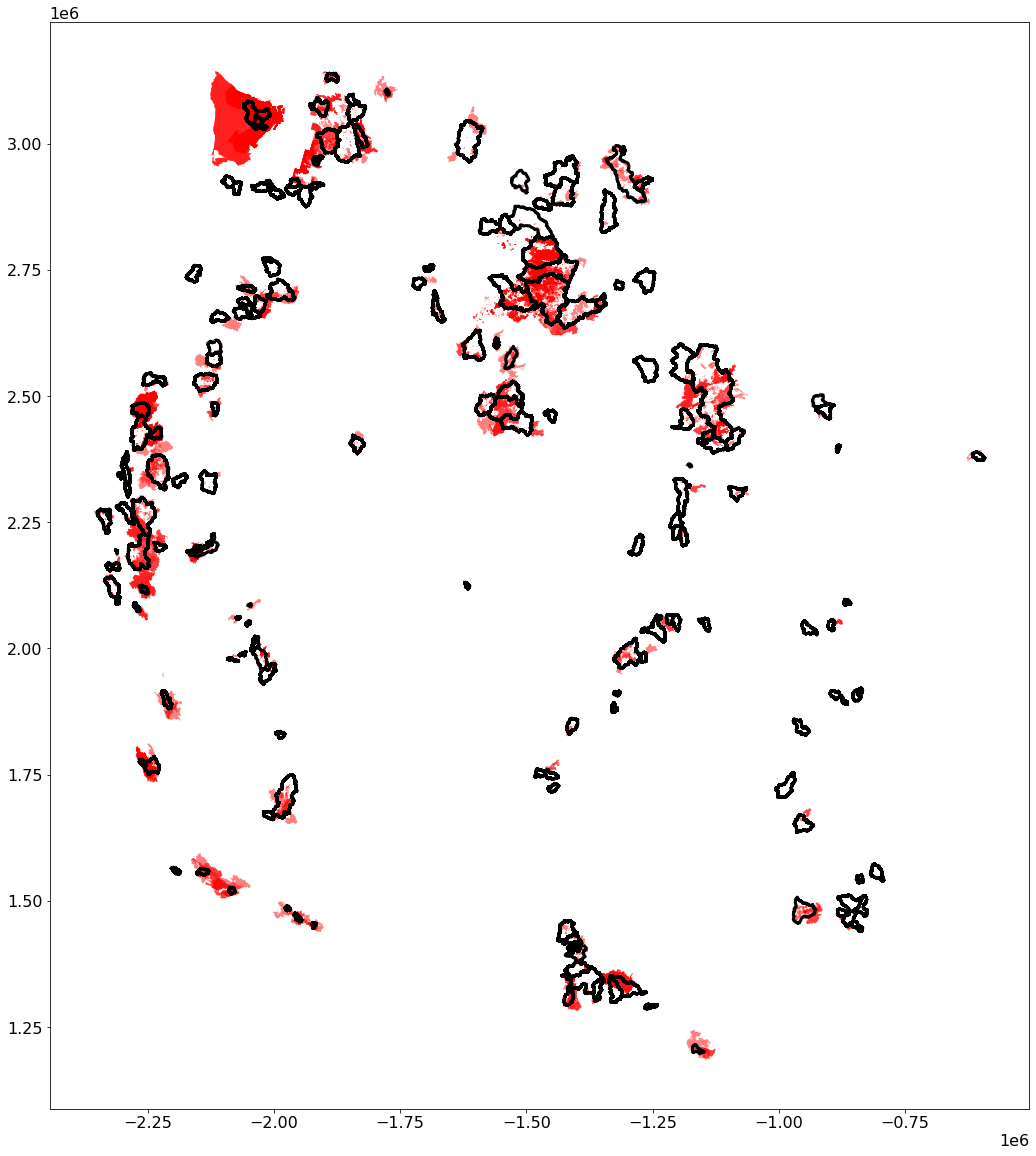

In [5]:
# gaged_basins
# fires_allyears
# snowzone_rp
test_basin = gaged_basins[gaged_basins.index==1927]
test_basin = test_basin.to_crs(fires_allyears.crs)
test_burned = gpd.overlay(fires_allyears,test_basin)
# print(test_basin.area,test_burned.area)
fig,ax=plt.subplots()
test_burned[test_burned.index==test_burned.index[1]].plot(ax=ax,color='r',alpha=0.5)
test_burned.plot(ax=ax,color='r',alpha = 0.5)
test_basin.boundary.plot(ax=ax,color='black')


ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [46]:
fire1 = test_burned[test_burned.index==test_burned.index[1]]

In [127]:
test_basin = gaged_basins[gaged_basins.index==1927]

<AxesSubplot:>

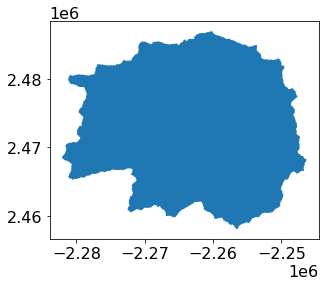

In [128]:
test_basin.plot()

C:\Users\Marianne\AppData\Local\Temp/ipykernel_13828/436379393.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...

  test = gpd.sjoin(test_basin,snowzone_rp)


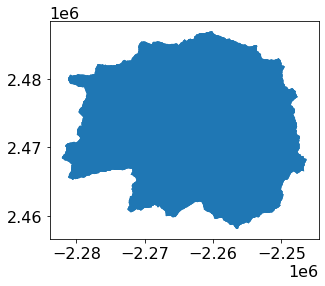

In [129]:
test = gpd.sjoin(test_basin,snowzone_rp)

fig,ax = plt.subplots()
test.plot(ax=ax)
plt.show()

In [54]:
## to do
## calculate how much of each basin is burned
## get mtbs burn severity layer and load
## clip to relevant years
## calculate how much of each basin is in the SSZ?
## how much of the burn area was SSZ?
## how to clip vectors to vectors?
## convert snowzone to a raster?
## need to download an elevation raster!! maybe SRTM?
## add contextily

,AREA,PERIMETER,GAGE_ID,geometry
1,79728300.0,55920.0,05014500,"POLYGON ((-1312215.000 2990115.000, -1312215.0..."


In [97]:
# test_snow = snowzone_rp.clip(test_basin.geometry)
test_snow =gpd.sjoin(snowzone_rp,test_basin)
fig,ax=plt.subplots()
test_snow.plot(ax=ax)
test_basin.boundary.plot(ax=ax)
#snowzone_rp.plot(ax=ax)

TypeError: '>=' not supported between instances of 'float' and 'Polygon'

In [59]:
ssz_raster = snowzone_rp.to_xarray()

In [81]:
fn = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean/GOSIF_GPP_2005.M08_Mean.tif'
tmp = rxr.open_rasterio(fn)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]] EPSG:4326


In [100]:
snowzone_4326 = snowzone.to_crs('epsg:4326')
gpp_snowzone = tmp.rio.clip(snowzone_4326.geometry)
test_gpp = tmp.rio.clip(test_basin.to_crs(tmp.rio.crs).geometry)


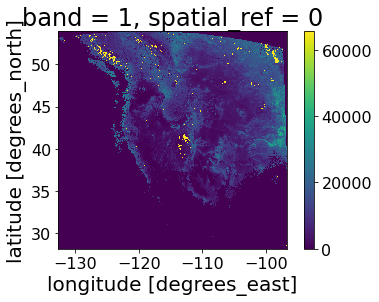

In [96]:
fig,ax = plt.subplots()
snowzone_4326.plot(ax=ax)
gpp_snowzone.plot(ax=ax)
plt.show()

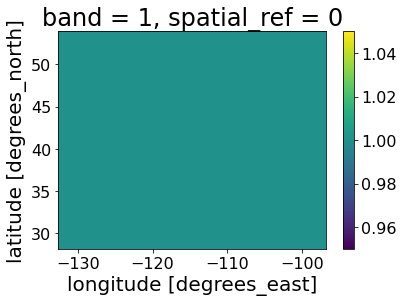

In [115]:
gpp_snowzone.notnull().plot()

<AxesSubplot:title={'center':'band = 1, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

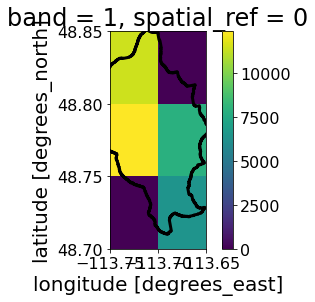

In [111]:
fig,ax=plt.subplots()
test_gpp.plot(ax=ax)
test_basin.to_crs(test_gpp.rio.crs).boundary.plot(ax=ax,color='k')

In [ ]:
## merge multiple fires? or just look at one year. what are the year bounds on the streamflow data
## how to get climate-based predictions
## runoff ratios from prism
## put this all on savio
## then autodownload and clip the prism bil files